In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
from numpy.linalg import eig

In [2]:
data=np.array([[3,4],[2,8],[6,9],[10,12]])

In [3]:
data

array([[ 3,  4],
       [ 2,  8],
       [ 6,  9],
       [10, 12]])

In [4]:
data=pd.DataFrame(data,columns=["math","bio"])

In [5]:
data

,math,bio
0,3,4
1,2,8
2,6,9
3,10,12


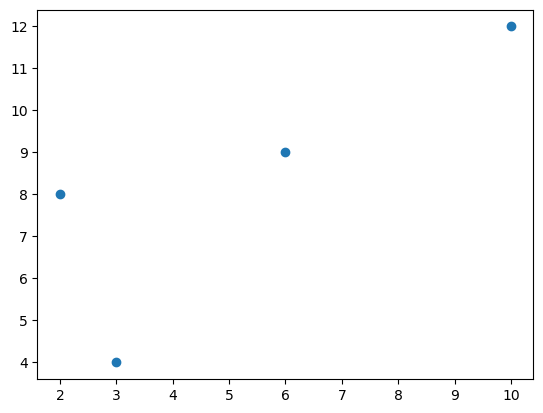

In [6]:
plt.scatter(data["math"], data["bio"])

1. Standardisation
2. Covarience Matrix
3. Eign Value
4. Principal Component Analysis

In [7]:
data["math"].mean()

5.25

In [8]:
data["bio"].mean()

8.25

In [9]:
meanbycol = np.mean(data, axis=0)

In [10]:
meanbycol

math    5.25
bio     8.25
dtype: float64

SND = (x - mean/std_dev)

In [11]:
deviation = data-meanbycol

In [12]:
deviation

,math,bio
0,-2.25,-4.25
1,-3.25,-0.25
2,0.75,0.75
3,4.75,3.75


In [13]:
stdbycol = np.std(deviation, axis=0)

In [14]:
stdbycol

math    3.112475
bio     2.861381
dtype: float64

In [15]:
scaled_data = deviation/stdbycol # Standard normal distrubution

In [16]:
scaled_data

,math,bio
0,-0.722897,-1.485297
1,-1.044185,-0.087370
2,0.240966,0.262111
3,1.526117,1.310556


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaled_data = scaler.fit_transform(data)

In [20]:
scaled_data

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [21]:
scaled_data.T

array([[-0.7228974 , -1.04418513,  0.2409658 ,  1.52611672],
       [-1.4852969 , -0.08737041,  0.26211122,  1.31055608]])

2. Convert in Coverience Matrix

In [22]:
cov_mat = np.cov(scaled_data.T)

In [23]:
cov_mat

array([[1.33333333, 1.07605651],
       [1.07605651, 1.33333333]])

3. Eigen Value & Eigen Vector

In [24]:
eig_value, eig_vector = eig(cov_mat)

In [25]:
eig_value

array([2.40938985, 0.25727682])

In [26]:
eig_vector

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [27]:
scaled_data

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

1. Finding Principal Component
2. transformation of data 

In [28]:
eig_vector.T

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [29]:
eig_vector.T.dot(scaled_data.T).T

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [30]:
from sklearn.decomposition import PCA
pca = PCA()

In [31]:
pca.fit_transform(scaled_data)

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [32]:
pd.DataFrame(pca.fit_transform(scaled_data), columns=["pC1", "pC2"])

,pC1,pC2
0,-1.561429,-0.539098
1,-0.800131,0.676570
2,0.355729,0.014952
3,2.005831,-0.152424


In [33]:
pca.explained_variance_ratio_

array([0.90352119, 0.09647881])

In [34]:
sum(pca.explained_variance_ratio_)

1.0

In [35]:
data2 = pd.read_csv("glass.csv")

In [36]:
data2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


1. Feature Selection : To reduce the number of columns & increase the accuracy for prediction
2. PCA - Dimention Reduction Feature extraction

In [37]:
data2.shape

(214, 10)

In [38]:
data2 = data2.drop(["Type"], axis=1)

In [39]:
data2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [41]:
scaled_data_2 = scaler.fit_transform(data2)

In [42]:
scaled_data_2

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [43]:
pca2 = PCA()

In [44]:
principal_component = pca2.fit_transform(scaled_data_2)

In [45]:
final_data = pd.DataFrame(principal_component, columns=["pc1","pc2","pc3","pc4","pc5","pc6","pc7","pc8","pc9"])

In [46]:
final_data

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210,-0.395600,-0.197160,0.016346
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960,-0.024158,-0.284214,-0.010790
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630,-0.367518,-0.095941,0.021640
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805,-0.052497,-0.002959,0.092035
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032,0.158570,-0.191316,0.002315
...,...,...,...,...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227,0.231162,-1.320186,0.189401,-0.028657
210,-2.397652,3.108236,-1.117502,0.288454,0.624723,0.618056,0.582361,0.131651,-0.013663
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687,1.247320,0.674122,-0.891710,0.046284
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008,1.003352,0.678899,0.074460,-0.027301


In [47]:
variance_of_component = pca2.explained_variance_ratio_

In [48]:
variance_of_component

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

In [49]:
variance_of_component.sort()

In [50]:
variance_of_component

array([1.78757536e-04, 7.09477197e-03, 4.09953826e-02, 5.86261325e-02,
       1.01555805e-01, 1.28651383e-01, 1.56093777e-01, 2.27785798e-01,
       2.79018192e-01])

In [51]:
max(variance_of_component)

0.27901819179456444

In [52]:
min(variance_of_component)

0.00017875753590172492

In [53]:
sum(variance_of_component)

0.9999999999999998

will have to work with only 90% of the data

In [54]:
sorted(list(variance_of_component), reverse=True)

[0.27901819179456444,
 0.22778579831670412,
 0.15609377710940472,
 0.12865138291980244,
 0.1015558052361561,
 0.05862613252208686,
 0.04099538259055586,
 0.007094771974823581,
 0.00017875753590172492]

In [55]:
var = sorted(list(variance_of_component), reverse=True)

In [56]:
sum(sorted(list(variance_of_component), reverse=True)[:5])

0.8931049553766317

In [57]:
sum(sorted(list(variance_of_component), reverse=True)[:7])

0.9927264704892744

In [58]:
np.cumsum(var)

array([0.27901819, 0.50680399, 0.66289777, 0.79154915, 0.89310496,
       0.95173109, 0.99272647, 0.99982124, 1.        ])

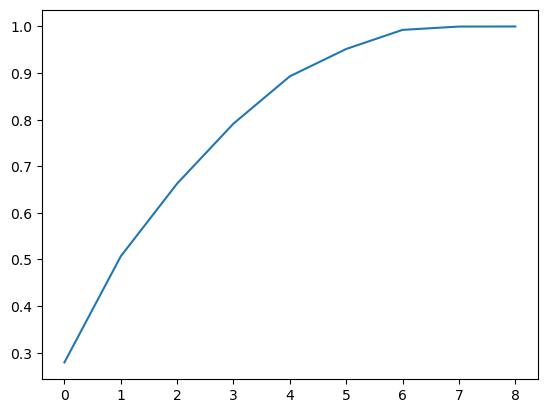

In [59]:
# Elbow method
plt.plot(np.cumsum(var))
plt.show()

In [63]:
final_to_final = final_data.iloc[:, 4:9]

In [64]:
final_to_final

,pc5,pc6,pc7,pc8,pc9
0,-0.251936,0.340210,-0.395600,-0.197160,0.016346
1,-0.257071,-0.115960,-0.024158,-0.284214,-0.010790
2,-0.237506,0.126630,-0.367518,-0.095941,0.021640
3,-0.476299,0.285805,-0.052497,-0.002959,0.092035
4,-0.432090,0.298032,0.158570,-0.191316,0.002315
...,...,...,...,...,...
209,0.103227,0.231162,-1.320186,0.189401,-0.028657
210,0.624723,0.618056,0.582361,0.131651,-0.013663
211,0.451687,1.247320,0.674122,-0.891710,0.046284
212,0.515008,1.003352,0.678899,0.074460,-0.027301
